In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm 

# nur fuer den Seiteneffekt: plt.gca(projection = '3d') funktioniert sonst nicht
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

In [2]:
theta_1d = np.linspace(0,   np.pi,  361) # 1/2 GRAD Schritte
phi_1d   = np.linspace(0, 2*np.pi, 721)  # 1/2 GRAD Schritte

theta_2d, phi_2d = np.meshgrid(theta_1d, phi_1d)
xyz_2d = np.array([np.sin(theta_2d) * np.sin(phi_2d),
                    np.sin(theta_2d) * np.cos(phi_2d),
                    np.cos(theta_2d)]) 

colormap = cm.ScalarMappable( cmap=plt.get_cmap("cool"))
colormap.set_clim(-.45, .45)
limit = .5

In [3]:
# Here we define the real version of the SH
def SHreal_lm(l, m, phi_2d, theta_2d):
    if m<0:
        ylm = (np.sqrt(2)*(-1)**m)*sph_harm(-m, l, phi_2d, theta_2d)
        return ylm.imag
    elif m>0:
        #print("Just before casting to real... ")
        ylm = (np.sqrt(2)*(-1)**m)*sph_harm(-m, l, phi_2d, theta_2d)
        return ylm.real
    else:
        ylm = sph_harm(0, l, phi_2d, theta_2d)
        return ylm

In [4]:
def show_Y_lm(l, m):
    print("Y_%i_%i" % (l,m)) # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    plt.title("$Y^{%i}_{%i}$" % (m,l))
    Y_lm = SHreal_lm(l, m, phi_2d, theta_2d)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2],facecolors=colormap.to_rgba(np.absolute(Y_lm)),rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
#ax.set_axis_off()

<IPython.core.display.Javascript object>


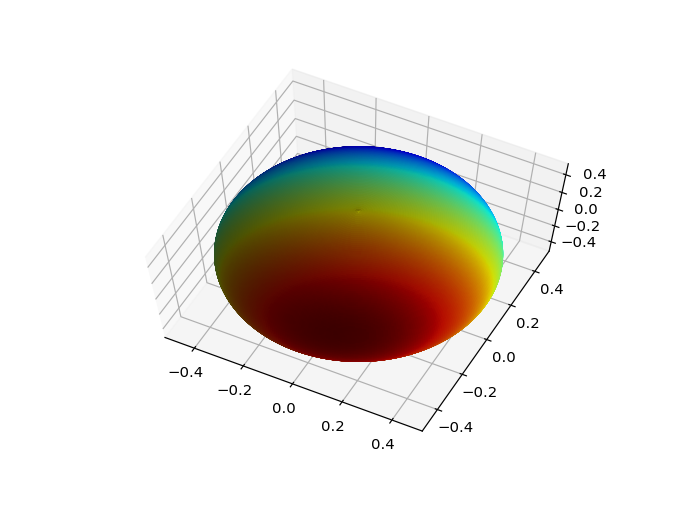

In [4]:
%matplotlib notebook
# Diese Schleifen erzeugen die Überlagerung der SH
Y_total = SHreal_lm(0, 0, phi_2d, theta_2d)
for l in range(0,2):
    for m in range(-l,l+1):
        Y_total+=np.random.uniform()*SHreal_lm(l, m, phi_2d, theta_2d)
plt.figure()
ax = plt.gca(projection = "3d")
r = np.abs(Y_total)*xyz_2d
height=np.sqrt(r[0]**2+r[1]**2+r[2]**2)
height=height-height.min()
height=height/height.max()
my_col = cm.jet(height)
#ax.plot_surface(r[0], r[1], r[2],facecolors=my_col,rstride=2, cstride=2)
ax.plot_surface(0.5*xyz_2d[0], 0.5*xyz_2d[1], 0.5*xyz_2d[2],facecolors=my_col,rstride=2, cstride=2)
ax.set_xlim(-limit,limit)
ax.set_ylim(-limit,limit)
ax.set_zlim(-limit,limit)
#   
plt.show()

In [ ]:
np.random

In [ ]:
np.random.uniform()

In [ ]:
x=np.linspace(0,10,11)
y=np.linspace(0,10,11)

In [ ]:
X,Y=np.meshgrid(x,y)

In [ ]:
X

In [ ]:
Y